In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader as pdr

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock]=pdr.DataReader(stock,'yahoo',start,end)

In [14]:
AAPL.describe()


,High,Low,Open,Close,Volume,Adj Close,column_name
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,204.000000
mean,102.477619,99.505642,100.998083,101.050711,1.543911e+08,100.667596,100.299753
std,24.069052,23.598793,24.016378,23.825330,7.143203e+07,23.932931,20.400490
min,57.125000,53.152500,57.020000,56.092499,3.013355e+07,55.661041,66.987145
25%,79.922501,78.462502,79.035004,79.212502,1.036460e+08,78.815979,80.625186
50%,110.879997,107.669998,109.132500,108.937500,1.372504e+08,108.510361,109.028247
75%,121.550003,118.570000,120.059998,120.300003,1.846420e+08,120.120506,116.844871
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396,130.121041


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-02-10 to 2021-02-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

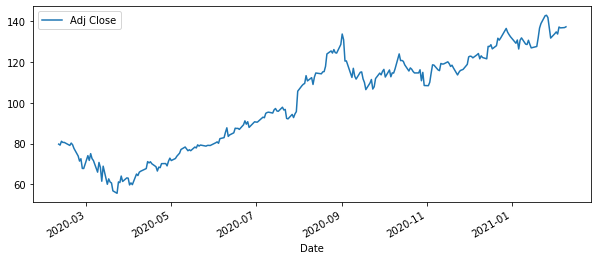

In [10]:
AAPL['Adj Close'].plot(legend = True,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

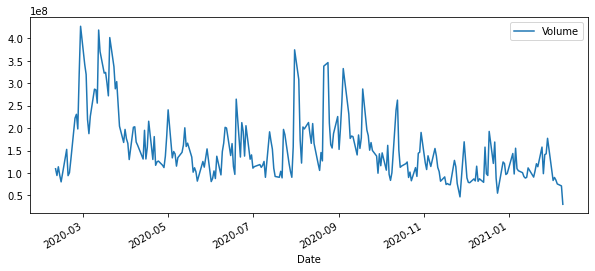

In [11]:
AAPL['Volume'].plot(legend = True,figsize = (10,4))

In [25]:
#ma_day = [10, 20 ,50]

#for ma in ma_day:
    #column_name = "MA in" + (str(ma)) + "days"
    
AAPL['MA in 10 days'] = AAPL['Adj Close'].rolling(10).mean()
AAPL['MA in 20 days'] = AAPL['Adj Close'].rolling(20).mean()
AAPL['MA in 50 days'] = AAPL['Adj Close'].rolling(50).mean()

<AxesSubplot:xlabel='Date'>

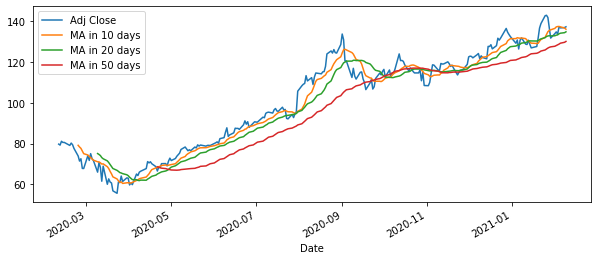

In [26]:
AAPL[['Adj Close','MA in 10 days','MA in 20 days','MA in 50 days']].plot(figsize = (10,4))

In [27]:
AAPL['Daily_return'] = AAPL['Adj Close'].pct_change ()

<AxesSubplot:xlabel='Date'>

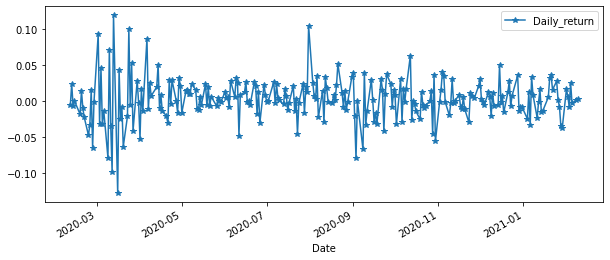

In [28]:
AAPL['Daily_return'].plot(figsize =(10,4), legend = True, marker = '*')

C:\Users\Ankita Sharma\project\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_return', ylabel='Density'>

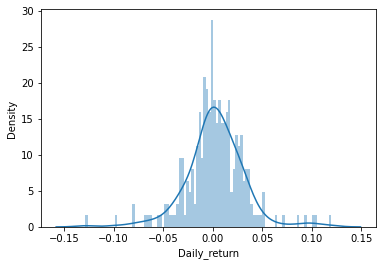

In [29]:
sns.distplot(AAPL['Daily_return'].dropna(),bins= 100)

<AxesSubplot:>

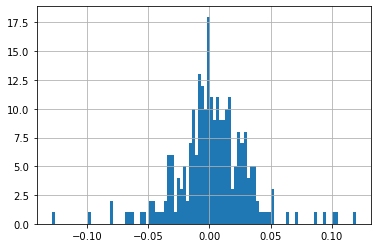

In [30]:
AAPL['Daily_return'].hist(bins = 100)

In [31]:
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [32]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,79.769165,1508.680054,186.721939,2133.909912
2020-02-11,79.287888,1508.790039,182.506607,2150.800049
2020-02-12,81.170799,1518.270020,182.773773,2160.000000
2020-02-13,80.592773,1514.660034,181.784271,2149.870117
2020-02-14,80.612625,1520.739990,183.407059,2134.870117


In [33]:
tech_rets = closing_df.pct_change()

In [34]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,NaN,NaN,NaN,NaN
2020-02-11,-0.006033,0.000073,-0.022575,0.007915
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690
2020-02-14,0.000246,0.004014,0.008927,-0.006977
...,...,...,...,...
2021-02-03,-0.007778,0.073961,0.014571,-0.019962
2021-02-04,0.025758,-0.003720,-0.004074,0.005576
2021-02-05,-0.003098,0.017276,0.000785,0.006349


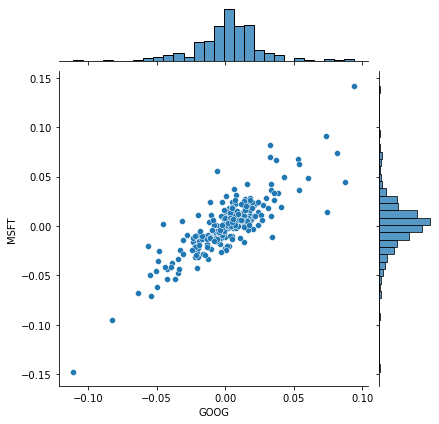

In [35]:
sns.jointplot(x = "GOOG", y = "MSFT", data = tech_rets,kind = 'scatter')

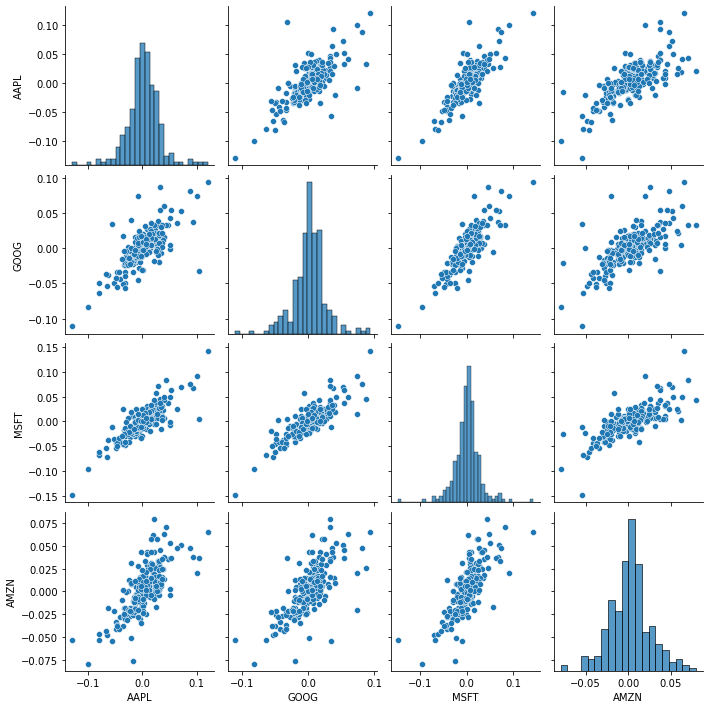

In [36]:
sns.pairplot(tech_rets.dropna())

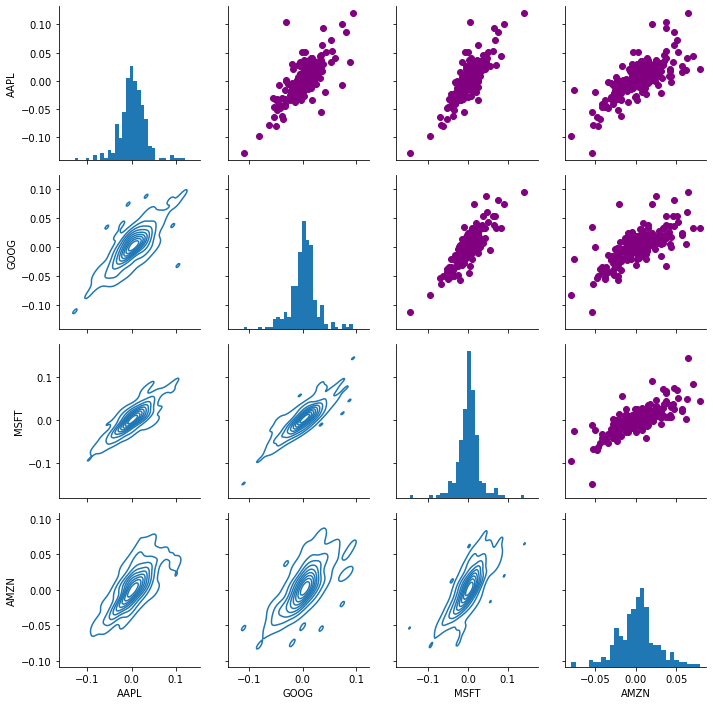

In [37]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color ='purple')

returns_fig.map_lower(sns.kdeplot)

returns_fig.map_diag(plt.hist,bins = 30)

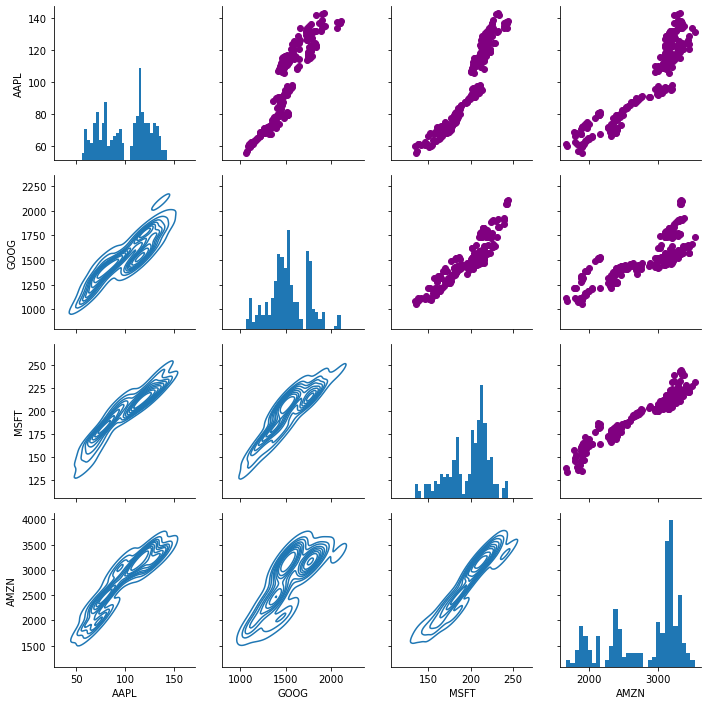

In [38]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color ='purple')

returns_fig.map_lower(sns.kdeplot)

returns_fig.map_diag(plt.hist,bins = 30)

In [39]:
#sns.corrplot(tech_rets.dropna(),annot = True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

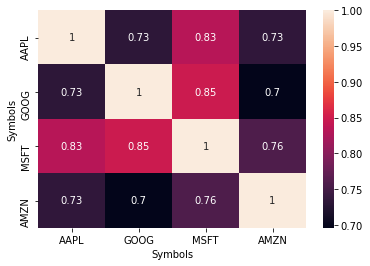

In [40]:
corr = tech_rets.dropna().corr()

sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

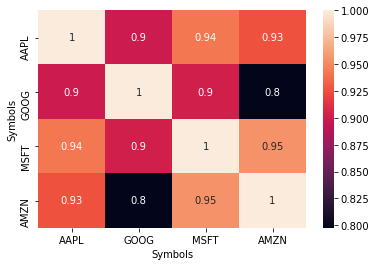

In [41]:
corr = closing_df.corr()

sns.heatmap(corr,annot=True)

In [42]:
rets = tech_rets.dropna()
area = np.pi*20

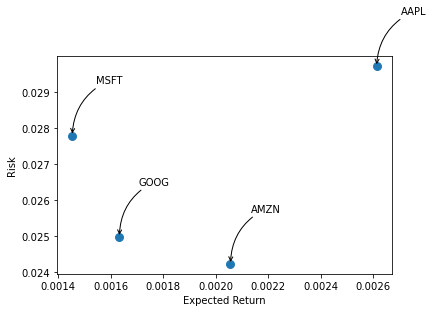

In [49]:
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext = (50,50),
    textcoords = "offset points", ha = 'right', va = 'bottom',
    arrowprops = dict (arrowstyle ='->',connectionstyle ='arc3,rad = 0.3')
    )

C:\Users\Ankita Sharma\project\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_return', ylabel='Density'>

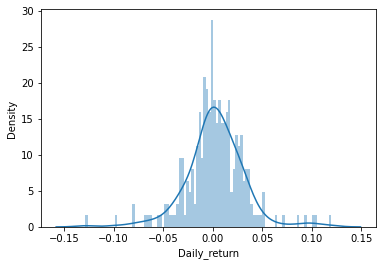

In [44]:
sns.distplot(AAPL['Daily_return'].dropna(),bins= 100)

In [45]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-11,-0.006033,0.000073,-0.022575,0.007915
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690
2020-02-14,0.000246,0.004014,0.008927,-0.006977
2020-02-18,-0.018311,-0.000704,0.010143,0.009743


In [46]:
#BOOTSTRAP METHOD

rets['AAPL'].quantile(0.05)

-0.043552699969314615

In [56]:
#MONTECARLO METHOD

days = 365

dt = 1/days

mu = rets['GOOG'].mean()

sigma = rets['GOOG'].std()

In [57]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0]= start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price
                              

In [58]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-10,1509.500000,1474.319946,1474.319946,1508.680054,1419900,1508.680054
2020-02-11,1529.630005,1505.637939,1511.810059,1508.790039,1344600,1508.790039
2020-02-12,1520.694946,1508.109985,1514.479980,1518.270020,1167600,1518.270020
2020-02-13,1527.180054,1504.599976,1512.689941,1514.660034,929500,1514.660034
2020-02-14,1520.739990,1507.339966,1515.599976,1520.739990,1197800,1520.739990


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

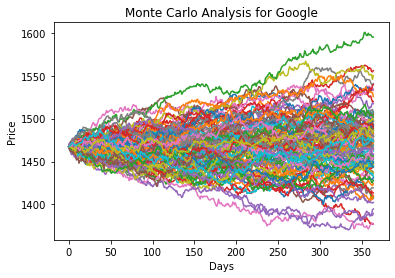

In [59]:
start_price = 1467.300049

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    

plt.xlabel('Days')
plt.ylabel('Price')

plt.title("Monte Carlo Analysis for Google")

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAAD4CAYAAAAAczaOAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAV0klEQVR4nO3df6xfd33f8efLdjABGiVpbiLPNrNhVjcnYiVceWFUqFK6xTCEs0qZjNRhbZGsoXSj06ouLlPpNFliv7oVqYnkQYbpUCKLUsWs0GK8IjSJ4t2QhMQxbkwDiYmJb0G0oUUB2+/98T3f6/N17vW9vt977/frc58P6fp7vp9zzve875Hv637u5/xKVSFJWh3WjLoASdLKMfQlaRUx9CVpFTH0JWkVMfQlaRVZN+oC5nPTTTfVli1bRl2GJF1VHnvssT+vqolL28c+9Lds2cLU1NSoy5Ckq0qSb8/W7vCOJK0ihr4krSKGviStIoa+JK0ihr4krSKGviStIoa+JK0inQ39quJjn/0dnj39jVGXIkljo5Oh/72/+AH/5LMHOFzX8tHfPTTqciRpbIz9FbmLce7s8/zwmmt5/LVv4af/1l+NuhxJGhud7Onfsu0tPPz29wBQGXExkjRGOhn6ANdffyOp86MuQ5LGSmdDHyBAxa6+JPV1PPQLH/suSRd1OvQBsKcvSTPmDf0kDyU5m+TpWeb9apJKclOrbV+SU0lOJrmr1f62JE818z6aLH8ax36+JA1YSE//E8DOSxuTbAb+AfB8q207sBu4tVnngSRrm9kPAnuBbc3Xqz5zqTm8I0mD5g39qvoy8P1ZZv034NdgIFd3AY9U1StV9RxwCtiRZANwXVV9paoK+CRw97DFL0Th8I4k9S1qTD/Je4HvVNWTl8zaCLzQen+6advYTF/aPtfn700ylWRqenp6MSX2PofyPH1Jarni0E/yOuBDwG/MNnuWtrpM+6yq6kBVTVbV5MTEq57rewUc3JGktsXchuHNwFbgyeZY7Cbga0l20OvBb24tuwl4sWnfNEv7sgoO70hS2xX39Kvqqaq6uaq2VNUWeoF+e1V9FzgM7E6yPslWegdsj1XVGeDlJHc0Z+28H3h06b6N2YWa/W8MSVqlFnLK5sPAV4CfSXI6yb1zLVtVx4FDwDPAHwL3Vc3cC+EDwMfoHdz9JvD5IWufl6dsStKgeYd3qup988zfcsn7/cD+WZabAm67wvqGEooLdvUlaUbHr8i1py9JbZ0O/d4N10ZdhSSNj06H/txni0rS6tTp0LenL0mDOh763ntHkto6HfoO70jSoE6Hfu+KXElSX6dD356+JA3qdOhn5h9JEnQ+9D2QK0ltqyD07epLUl+nQ58y9CWprdOh75i+JA3qeOg7pi9JbZ0OfSgqdvUlqa/ToW/cS9KgToc+Du9I0oBOh35a/0qSFvaM3IeSnE3ydKvtPyf5RpKvJ/n9JNe35u1LcirJySR3tdrfluSpZt5HmwekLysP5ErSoIX09D8B7Lyk7QhwW1W9BfhTYB9Aku3AbuDWZp0Hkqxt1nkQ2Atsa74u/UxJ0jKbN/Sr6svA9y9p+0JVnWve/gmwqZneBTxSVa9U1XPAKWBHkg3AdVX1laoq4JPA3Uv0Pcwpnr0jSQOWYkz/nwOfb6Y3Ai+05p1u2jY205e2zyrJ3iRTSaamp6cXXVgc3JGkAUOFfpIPAeeAT/WbZllsrvsbz5nIVXWgqiaranJiYmLx9VFc8ECuJM1Yt9gVk+wB3gPc2QzZQK8Hv7m12CbgxaZ90yztkqQVtKiefpKdwL8F3ltVf92adRjYnWR9kq30Dtgeq6ozwMtJ7mjO2nk/8OiQtc9fZzmmL0lt8/b0kzwM/DxwU5LTwIfpna2zHjjSnHn5J1X1L6rqeJJDwDP0hn3uq6rzzUd9gN6ZQNfSOwbweSRJK2re0K+q983S/PHLLL8f2D9L+xRw2xVVNyTvpy9Jgzp9Ra4kaVCnQ9+eviQN6njoQ5n5kjSj06F/mUsBJGlV6nToBxzekaSWbod+2dOXpLZOhz4eyJWkAZ0O/d6BXENfkvo6Hvo+REWS2jod+pKkQZ0OfS/OkqRBHQ99SVJbp0Pfs3ckaVDHQx+7+5LU0unQT9nTl6S2boc+3n1Hkto6HfpzP5NdklanToe+F2dJ0qB5Qz/JQ0nOJnm61XZjkiNJnm1eb2jN25fkVJKTSe5qtb8tyVPNvI82D0hfVt5lU5IGLaSn/wlg5yVt9wNHq2obcLR5T5LtwG7g1madB5KsbdZ5ENgLbGu+Lv3MJRfKe+9IUsu8oV9VXwa+f0nzLuBgM30QuLvV/khVvVJVzwGngB1JNgDXVdVXqqqAT7bWWT6O7UjSgMWO6d9SVWcAmtebm/aNwAut5U43bRub6UvbZ5Vkb5KpJFPT09OLLLHX0/dAriRdtNQHcmdL2LmSd85+eFUdqKrJqpqcmJgYqiA7+5J00WJD/6VmyIbm9WzTfhrY3FpuE/Bi075plvZl5Q3XJGnQYkP/MLCnmd4DPNpq351kfZKt9A7YHmuGgF5Ockdz1s77W+tIklbIuvkWSPIw8PPATUlOAx8GPgIcSnIv8DxwD0BVHU9yCHgGOAfcV1Xnm4/6AL0zga4FPt98LStP2ZSkQfOGflW9b45Zd86x/H5g/yztU8BtV1TdkHr33pEk9XX6itwee/qS1Nfp0O9dnDXqKiRpfHQ+9O3pS9JFnQ598ECuJLV1OvRTXpwlSW3dDn0vzpKkAZ0OfUnSoE6Hvj19SRrU6dCXJA3qdOj7EBVJGtTp0PfUHUka1OnQ94ZrkjSo46HvgVxJaut86EuSLup06FMO70hSW6dD3zF9SRrU6dAHH6IiSW1DhX6Sf53keJKnkzyc5LVJbkxyJMmzzesNreX3JTmV5GSSu4Yvf576Wv9KkoYI/SQbgX8FTFbVbcBaYDdwP3C0qrYBR5v3JNnezL8V2Ak8kGTtcOXPz56+JF007PDOOuDaJOuA1wEvAruAg838g8DdzfQu4JGqeqWqngNOATuG3P5lpXyIiiS1LTr0q+o7wH8BngfOAH9RVV8AbqmqM80yZ4Cbm1U2Ai+0PuJ007ZsPJArSYOGGd65gV7vfSvwN4DXJ/mly60yS9usoy9J9iaZSjI1PT292BLxQK4kDRpmeOcXgOeqarqqfgJ8Bvj7wEtJNgA0r2eb5U8Dm1vrb6I3HPQqVXWgqiaranJiYmLRBaYAb7gmSTOGCf3ngTuSvC5JgDuBE8BhYE+zzB7g0Wb6MLA7yfokW4FtwLEhtr8g9vQl6aJ1i12xqr6a5NPA14BzwOPAAeANwKEk99L7xXBPs/zxJIeAZ5rl76uq80PWf1lr8ECuJLUtOvQBqurDwIcvaX6FXq9/tuX3A/uH2eYV8TYMkjRgFVyRa+hLUl+nQ793yqYkqa/ToY9j+pI0oNOh78VZkjSo26FfDu9IUlunQ9/hHUka1OnQ90CuJA3qdOj3Et+eviT1dTr043n6kjSg46Hv8I4ktXU79B3ekaQBnQ59KC4Y+pI0o+OhD/b0JemiTod+vMumJA3oduh7GFeSBnQ89O3pS1Jbp0MfDH1Jaut26JfDO5LUNlToJ7k+yaeTfCPJiSRvT3JjkiNJnm1eb2gtvy/JqSQnk9w1fPnz1Ic9fUlqG7an/9vAH1bV3wb+LnACuB84WlXbgKPNe5JsB3YDtwI7gQeSrB1y+5flFbmSNGjRoZ/kOuCdwMcBqurHVfUDYBdwsFnsIHB3M70LeKSqXqmq54BTwI7Fbn9BylsrS1LbMD39NwHTwP9M8niSjyV5PXBLVZ0BaF5vbpbfCLzQWv900/YqSfYmmUoyNT09vegCQ1Hp9mELSboSwyTiOuB24MGqeivwVzRDOXOYrcs96+hLVR2oqsmqmpyYmFh0gf0NHjn8uUV/hiR1yTChfxo4XVVfbd5/mt4vgZeSbABoXs+2lt/cWn8T8OIQ259f8yvl22e/taybkaSrxaJDv6q+C7yQ5GeapjuBZ4DDwJ6mbQ/waDN9GNidZH2SrcA24Nhit78Q/Z7+y9/77nJuRpKuGuuGXP9fAp9K8hrgz4B/Ru8XyaEk9wLPA/cAVNXxJIfo/WI4B9xXVeeH3P48el39cz/60fJuRpKuEkOFflU9AUzOMuvOOZbfD+wfZptXIs3wzk/O/3ilNilJY21VnNpy4dyFUZcgSWOh06Gf/m0YlnsUSZKuEp0O/b7zMfQlCToe+v2zd+KN1yQJ6Hro98P+Qqe/TUlasI6nYRP667z/jiRBx0M/zQCPgzuS1NPp0O8/RMWbrklST6fTsD+os25tp79NSVqwVZGGueDFWZIEHQ/9/tk7qU5/m5K0YKsjDT15R5KAjod+/4Zrhr4k9XQ69Psna15Y3uevS9JVo9Oh3+/gr/HeO5IEdDz0+1dlxZ6+JAEdD/14cZYkDeh0Gl48fuvwjiTBEoR+krVJHk/yv5v3NyY5kuTZ5vWG1rL7kpxKcjLJXcNue14zZ+90+nebJC3YUqThB4ETrff3A0erahtwtHlPku3AbuBWYCfwQJZ5sD1N6pfnbEoSMGToJ9kE/CPgY63mXcDBZvogcHer/ZGqeqWqngNOATuG2f7C6/Q+m5IEw/f0/zvwa0D75ja3VNUZgOb15qZ9I/BCa7nTTdurJNmbZCrJ1PT09KKL62d9yp6+JMEQoZ/kPcDZqnpsoavM0jZrF7yqDlTVZFVNTkxMLLbEmdC3ny9JPeuGWPcdwHuTvBt4LXBdkv8FvJRkQ1WdSbIBONssfxrY3Fp/E/DiENtfgGZMf409fUmCIXr6VbWvqjZV1RZ6B2j/T1X9EnAY2NMstgd4tJk+DOxOsj7JVmAbcGzRlV+BNd0+M1WSFmyYnv5cPgIcSnIv8DxwD0BVHU9yCHgGOAfcV1XLegJ9/+yd8+UAjyTBEoV+VX0J+FIz/T3gzjmW2w/sX4ptLkxvWMfRHUnq6fa4R/82DGu6/W1K0kJ1Og3XzAzrOLwjSdDx0O9LHN+RJOh46PfP079g6EsS0PHQ7zPzJamn26HvqZqSNKDTod/v4HuXTUnq6XToz5y04w3XJAnoeuj3U3+NwzySBB0P/Zn+vZkvSUDHQ7/P8/QlqafToe/99CVpUMdDv7n3jj19SQK6HvqvmpCk1a3ToV9enCVJAzod+jMXZzm8I0lA10N/pqdv6EsSdDz0Z26/YOZLEjBE6CfZnOSPk5xIcjzJB5v2G5McSfJs83pDa519SU4lOZnkrqX4Bi5bY3OypiP7ktQzTE//HPBvqurvAHcA9yXZDtwPHK2qbcDR5j3NvN3ArcBO4IEka4cpfqFiV1+SgCFCv6rOVNXXmumXgRPARmAXcLBZ7CBwdzO9C3ikql6pqueAU8COxW5/IXKhf56+fX1JgiUa00+yBXgr8FXglqo6A71fDMDNzWIbgRdaq51u2mb7vL1JppJMTU9PL0WFS/AZknT1Gzr0k7wB+D3gV6rqLy+36Cxts3bBq+pAVU1W1eTExMQQ1dXcW5akVWio0E9yDb3A/1RVfaZpfinJhmb+BuBs034a2NxafRPw4jDbn0//jsreTl+SeoY5eyfAx4ETVfVbrVmHgT3N9B7g0Vb77iTrk2wFtgHHFrv9K6x2ZTYjSWNu3RDrvgP4p8BTSZ5o2n4d+AhwKMm9wPPAPQBVdTzJIeAZemf+3FdV54fY/rxmbri2nBuRpKvIokO/qv4vc3eh75xjnf3A/sVu80rNhL0dfUkCOn5F7sz99L33jiQBHQ/9PiNfknq6Hfo+REWSBnQ69GdurTzSKiRpfHQ69L04S5IGdTr0fTC6JA3qdOh7zqYkDep26NvHl6QB3Q79/vDOGnv6kgQdD32jXpIGdTr0Z3r6xr8kAV0PfS70Xsx8SQI6Hvr9Z+N6OFeSejod+v3bMMTbMEgS0PXQb9jTl6Seboe+j0uUpAGdDv3+k7M8kitJPd0O/ebVnr4k9ax46CfZmeRkklNJ7l/ObVU5mi9JbSsa+knWAr8DvAvYDrwvyfZl22B5yqYktS36weiLtAM4VVV/BpDkEWAX8MyybK25t/Jn3/x2vvjFP1iWTUjScvnFL/4B/+4jDyzpZ6506G8EXmi9Pw38vUsXSrIX2Avwxje+cdEbW/PDH/FzLx/jr69Zv+jPkKSRydol/8iVDv3ZDqm+avSlqg4ABwAmJycXPTrz6//htxe7qiSN3rv2LPlHrvSB3NPA5tb7TcCLK1yDJK1aKx36/w/YlmRrktcAu4HDK1yDJK1aKzq8U1Xnkvwy8EfAWuChqjq+kjVI0mq20mP6VNXngM+t9HYlSR2/IleSNMjQl6RVxNCXpFXE0JekVSTjflOyJNPAtxe5+k3Any9hOcvFOpfO1VAjWOdSs85X+5tVNXFp49iH/jCSTFXV5KjrmI91Lp2roUawzqVmnQvn8I4krSKGviStIl0P/QOjLmCBrHPpXA01gnUuNetcoE6P6UuSBnW9py9JajH0JWkV6WTor+TD169Ukm8leSrJE0mmmrYbkxxJ8mzzesMI6nooydkkT7fa5qwryb5m/55McteI6/zNJN9p9ukTSd49yjqTbE7yx0lOJDme5INN+1jtz8vUOW7787VJjiV5sqnz3zft47Y/56pzrPYnVdWpL3q3bP4m8CbgNcCTwPZR19Wq71vATZe0/Sfg/mb6fuA/jqCudwK3A0/PVxe9h9o/CawHtjb7e+0I6/xN4FdnWXYkdQIbgNub6Z8C/rSpZaz252XqHLf9GeANzfQ1wFeBO8Zwf85V51jtzy729Gcevl5VPwb6D18fZ7uAg830QeDulS6gqr4MfP+S5rnq2gU8UlWvVNVzwCl6+31Udc5lJHVW1Zmq+loz/TJwgt7zocdqf16mzrmMqs6qqh82b69pvorx259z1TmXkdTZxdCf7eHrl/uPvNIK+EKSx5oHwAPcUlVnoPeDCNw8suoGzVXXOO7jX07y9Wb4p/9n/sjrTLIFeCu9Xt/Y7s9L6oQx259J1iZ5AjgLHKmqsdyfc9QJY7Q/uxj6C3r4+gi9o6puB94F3JfknaMuaBHGbR8/CLwZ+FngDPBfm/aR1pnkDcDvAb9SVX95uUVnaRtlnWO3P6vqfFX9LL3nau9IcttlFh+3Osdqf3Yx9Mf64etV9WLzehb4fXp/zr2UZANA83p2dBUOmKuusdrHVfVS88N2AfgfXPwTeWR1JrmGXpB+qqo+0zSP3f6crc5x3J99VfUD4EvATsZwf/a16xy3/dnF0B/bh68neX2Sn+pPA/8QeJpefXuaxfYAj46mwleZq67DwO4k65NsBbYBx0ZQHzDzA9/3j+ntUxhRnUkCfBw4UVW/1Zo1VvtzrjrHcH9OJLm+mb4W+AXgG4zf/py1znHbn8t6lHhUX8C76Z2J8E3gQ6Oup1XXm+gdrX8SON6vDfhp4CjwbPN64whqe5jen54/odcDufdydQEfavbvSeBdI67zd4GngK/T+0HaMMo6gZ+j92f614Enmq93j9v+vEyd47Y/3wI83tTzNPAbTfu47c+56hyr/eltGCRpFeni8I4kaQ6GviStIoa+JK0ihr4krSKGviStIoa+JK0ihr4krSL/H/sWxMrYhG+EAAAAAElFTkSuQmCC

In [62]:
runs = 10000

simulations = np.zeros(runs)

for run in range (runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for google stocks after 365 days')

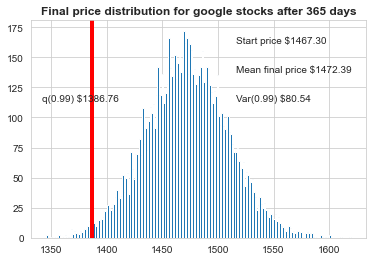

In [68]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200)

# start price
plt.figtext(0.6,0.8,s = "Start price $%0.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7,s = "Mean final price $%0.2f" %simulations.mean())

#variance of the price(within 99% confidence interval)
plt.figtext(0.6,0.6,s = "Var(0.99) $%0.2f" %(start_price-q))

#Display 1% quantile
plt.figtext(0.15,0.6,"q(0.99) $%0.2f" %q)

#plot a line at 1% quantile range
plt.axvline(x=q, linewidth = 4, color = 'r')

#Title
plt.title("Final price distribution for google stocks after %s days" %days, weight = 'bold')